In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/processed/pdf_paragraphs.csv')
df.head()

,document,page,text,cleaned_text
0,SaltLakeCity.pdf,1,ARTICLE E. USE OF GENERATIVE ARTIFICIAL INTELL...,purpose this article provides guidance regardi...
1,SaltLakeCity.pdf,1,ARTICLE E. USE OF GENERATIVE ARTIFICIAL INTELL...,definitions artificial intelligence ai machine...
2,SaltLakeCity.pdf,1,ARTICLE E. USE OF GENERATIVE ARTIFICIAL INTELL...,artificial intelligence system any system soft...
3,SaltLakeCity.pdf,1,ARTICLE E. USE OF GENERATIVE ARTIFICIAL INTELL...,compliant artificial intelligence platform gen...
4,SaltLakeCity.pdf,1,ARTICLE E. USE OF GENERATIVE ARTIFICIAL INTELL...,generative artificial intelligence branch of a...


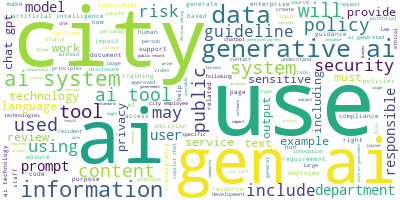

In [5]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['cleaned_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [33]:

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

# 1) Build stopwords (toggle ACRONYMS_OPTIONAL as you prefer)
CITY_STOP = {'boston','cambridge','san','francisco','long','beach','lebanon','tempe','jose','dc','washington','district','columbia','octo','itd','tid','doit','city','county','department','division','office','agency','bureau'}
POLICY_BOILERPLATE = {'policy','policies','guidelines','principles','definitions','purpose','scope','procedures','glossary','references','contact','versioning','effective','adopted','date','chapter','section','appendix','document','documents','table','contents','page','version'}
DATES_ADMIN = {'january','february','march','april','may','june','july','august','september','october','november','december','2023','2024','2025','2026','v1','v1.1','v1.2','v1.3'}
TOOLS_VENDORS = {'copilot','microsoft','chatgpt','gemini','claude','snowflake','adobe','teams','sharepoint'}
ACRONYMS_OPTIONAL = {'22j','pra','wisp','baa','phi','pii'}  # remove from union to keep these tokens
#GENERAL_EXTRAS = {'use','using','used','users','staff','employees','tools','tool','services','work','content','information','data','generated','review','edit','ensure','include','includes','including','public','private','sensitive','confidential','approved','under','available','provide','provides','support','requirements','risk','risks','security','privacy'}

DOMAIN_STOPWORDS = CITY_STOP | POLICY_BOILERPLATE | DATES_ADMIN | TOOLS_VENDORS | ACRONYMS_OPTIONAL #| GENERAL_EXTRAS
STOPWORDS = set(ENGLISH_STOP_WORDS) | DOMAIN_STOPWORDS


In [34]:
# 2) Vectorize (bigrams + hyphen-aware tokens)
vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    ngram_range=(1, 2),
    max_df=0.90,
    min_df=2,
    token_pattern=r'(?u)\b[a-z][a-z\-]{2,}\b'
)
X = vectorizer.fit_transform(df['cleaned_text'])
terms = vectorizer.get_feature_names_out()


In [35]:

n_topics = 10  # start 8–15 for policy corpora; tune based on coherence
lda = LatentDirichletAllocation(
    n_components=n_topics,
    learning_method='batch',
    max_iter=30,
    random_state=42
).fit(X)

def print_topics(model, feature_names, n_top_words=15):
    for idx, topic in enumerate(model.components_):
        top = topic.argsort()[-n_top_words:][::-1]
        print(f"Topic {idx:02d}: " + ", ".join(feature_names[i] for i in top))


print_topics(lda, terms, n_top_words=5)

Topic 00: use, intelligence, artificial intelligence, artificial, information
Topic 01: data, chat, content, additional, uses
Topic 02: use, gen, tools, public, systems
Topic 03: review, technology, use, tools, responsible
Topic 04: systems, content, number, use, guidance
Topic 05: data, decision, making, decision making, review
Topic 06: generative, data, chat, gpt, learning
Topic 07: generative, use, content, using, help
Topic 08: information, use, systems, data, chat
Topic 09: information, public, data, sensitive, government


In [31]:
import pandas as pd
from collections import Counter
import re

def suggest_stopwords(texts, top_k=200):
    #    # crude unigram tokenizer aligned with token_pattern
    uni = Counter()
    for t in texts:
        for w in re.findall(r'[a-z][a-z\-]{2,}', t.lower()):
            uni[w] += 1
    # Return candidates that are high-frequency and uninformative by inspection
    return [w for w, c in uni.most_common(top_k)]

candidates = suggest_stopwords(df['cleaned_text'], top_k=200)


In [32]:
candidates

['the',
 'and',
 'for',
 'city',
 'use',
 'that',
 'information',
 'with',
 'you',
 'data',
 'generative',
 'gen',
 'systems',
 'are',
 'tools',
 'this',
 'public',
 'can',
 'not',
 'content',
 'technology',
 'will',
 'policy',
 'these',
 'any',
 'from',
 'used',
 'chat',
 'should',
 'security',
 'other',
 'may',
 'using',
 'responsible',
 'your',
 'human',
 'guidelines',
 'when',
 'system',
 'review',
 'our',
 'such',
 'privacy',
 'must',
 'gpt',
 'employees',
 'generated',
 'all',
 'sensitive',
 'work',
 'department',
 'their',
 'intelligence',
 'including',
 'staff',
 'language',
 'include',
 'provide',
 'risks',
 'risk',
 'users',
 'tool',
 'have',
 'into',
 'text',
 'artificial',
 'example',
 'training',
 'models',
 'approved',
 'they',
 'government',
 'new',
 'ensure',
 'make',
 'model',
 'but',
 'access',
 'support',
 'code',
 'services',
 'more',
 'copilot',
 'enterprise',
 'prompt',
 'guidance',
 'technologies',
 'ethical',
 'district',
 'resources',
 'outputs',
 'uses',
 'lea

In [ ]:
# --- Build stopwords ---
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Your list (paste as-is; dedup happens automatically via set)
INCLUDE = {
    'the','and','for','city','use','that','information','with','you',
    'generative','gen','systems','are','tools','this','can','not',
    'content','technology','will','policy','these','any','from','used','chat',
    'should','other','may','using','your',
    'guidelines','when','system','our','such','must','gpt',
    'generated','all', 'work','department','their',
    'intelligence','including','staff','language','include','provide',
    'users','tool','have','into','artificial','example','training',
    'models','they','government','new','ensure','make','model','but',
    'services','more','copilot',
    'guidance','technologies','district','resources','outputs','uses',
    'learning','based','section','potential','while',
    'its','also','was','large', 'policies','how','about',
    'includes','non', 'related','understand',
    'machine','through','generate','shall','fact','page',
    'document','microsoft','share','following','check','which','some','people','purpose','making','request','would',
    'person','name','out','development','only','output','before',
    'protected','general','where','practices','without','contact','tasks',
    'specific','process','date','cases','what','create',
    'write','lebanon','software','limited',
    'processes','impact','usage','has',
    'does','laws','could','required','version','itd','google','within','platforms',
    'might','follow','being',"salt", "lake", "salt lake", "summary"
}

STOPWORDS = set(ENGLISH_STOP_WORDS) | INCLUDE  # final stopword set

# --- Vectorizer tuned for policy text ---
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    ngram_range=(1, 3),                 # keep bigrams (e.g., "public records", "data protection")
    max_df=0.90,                        # mute ultra-common terms across corpus
    min_df=2,                            # require term appears in >= 2 docs/pages
    token_pattern=r'(?u)\b[a-z][a-z\-]{2,}\b'  # >=3 chars, allows hyphenated tokens
)

X = vectorizer.fit_transform(df['cleaned_text'])  # df should contain your cleaned text
terms = vectorizer.get_feature_names_out()

print("Vocab size:", len(terms))
print("Sample terms:", terms[:30])


Vocab size: 2040
Sample terms: ['ability' 'ability age' 'ability age religious' 'ability learn' 'able'
 'abstract' 'abstract perceptions' 'abstract perceptions analysis'
 'acceptable' 'access' 'access code' 'access code personal'
 'access disclosure' 'access financial' 'access financial account'
 'access public' 'accessibility' 'accessible' 'accordance'
 'accordance applicable' 'accordance security' 'account' 'account number'
 'account number credit' 'account obtained' 'account obtained publicly'
 'accountability' 'accountable' 'accounts' 'accounts providing']


In [43]:
n_topics = 20  # start 8–15 for policy corpora; tune based on coherence
lda = LatentDirichletAllocation(
    n_components=n_topics,
    learning_method='batch',
    max_iter=30,
    random_state=42
).fit(X)


print_topics(lda, terms, n_top_words=5)

Topic 00: risks, departments, define, minimizing, minimizing risks
Topic 01: data, sensitive, public, privacy, human
Topic 02: officer, security, public, chief, data
Topic 03: languages, help, learn, meeting, inclusion
Topic 04: scope, data, security, privacy, applies
Topic 05: status, regularly, privacy, discrimination, boston
Topic 06: summary, better, best, enhance, great
Topic 07: risk, public, email, drafting, responsible
Topic 08: number, data, public, security, human
Topic 09: public, data, consumer, public consumer, decision
Topic 10: bias, transparency, biases, transparency accountability, accountability
Topic 11: data, sensitive, report, audio, procedures
Topic 12: public, records, personally, public records, identifiable
Topic 13: don, cite, type, text, trained
Topic 14: principles, employees, team, emerging, risks
Topic 15: approved, ethical, tempe, data, responsible
Topic 16: data, images, innovation, university, patterns
Topic 17: support, reviewed, responsible, outcomes,